In [3]:
#Read in data and count rows
import pandas as pd
df=pd.read_csv("/Users/stefani/Desktop/Fire_Department_Calls_for_Service.csv")
len(df)

/Users/stefani/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19,20,25,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


4804041

In [4]:
#Look at sample of data
df.head(5)

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID
0,1030101,E18,306091,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:00:29 PM,04/12/2000 09:01:40 PM,04/12/2000 09:02:00 PM,NaN,...,False,NaN,1,ENGINE,1.0,8,4,Sunset/Parkside,"(37.7487247711275, -122.495504020186)",001030101-E18
1,1030104,M14,30612,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:09:02 PM,04/12/2000 09:10:17 PM,04/12/2000 09:10:29 PM,04/12/2000 09:12:11 PM,...,True,NaN,1,MEDIC,2.0,8,4,Sunset/Parkside,"(37.7540326780595, -122.502185504543)",001030104-M14
2,1030106,M36,30614,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:09:44 PM,04/12/2000 09:10:56 PM,04/12/2000 09:11:47 PM,NaN,...,False,NaN,1,MEDIC,1.0,2,6,Tenderloin,"(37.7764405100838, -122.418481123408)",001030106-M36
3,1030107,E01,30615,Alarms,04/12/2000,04/12/2000,04/12/2000 09:13:47 PM,04/12/2000 09:13:51 PM,04/12/2000 09:14:13 PM,04/12/2000 09:15:58 PM,...,False,NaN,1,ENGINE,3.0,3,6,Tenderloin,"(37.7825474000421, -122.412247935495)",001030107-E01
4,1030108,RS1,30616,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:14:43 PM,04/12/2000 09:16:11 PM,04/12/2000 09:16:24 PM,04/12/2000 09:18:20 PM,...,False,NaN,1,RESCUE SQUAD,2.0,1,3,Financial District/South Beach,"(37.7863072236365, -122.405294845215)",001030108-RS1


In [9]:
#show column names
list(df)

['Call Number',
 'Unit ID',
 'Incident Number',
 'Call Type',
 'Call Date',
 'Watch Date',
 'Received DtTm',
 'Entry DtTm',
 'Dispatch DtTm',
 'Response DtTm',
 'On Scene DtTm',
 'Transport DtTm',
 'Hospital DtTm',
 'Call Final Disposition',
 'Available DtTm',
 'Address',
 'City',
 'Zipcode of Incident',
 'Battalion',
 'Station Area',
 'Box',
 'Original Priority',
 'Priority',
 'Final Priority',
 'ALS Unit',
 'Call Type Group',
 'Number of Alarms',
 'Unit Type',
 'Unit sequence in call dispatch',
 'Fire Prevention District',
 'Supervisor District',
 'Neighborhooods - Analysis Boundaries',
 'Location',
 'RowID']

In [13]:
#count how many rows have missing Response DtTm to take them out of the calculations
df.isna().sum()

Call Number                                   0
Unit ID                                       0
Incident Number                               0
Call Type                                     0
Call Date                                     0
Watch Date                                    0
Received DtTm                                 0
Entry DtTm                                    0
Dispatch DtTm                                 0
Response DtTm                            405875
On Scene DtTm                           1104028
Transport DtTm                          3545777
Hospital DtTm                           3679106
Call Final Disposition                        0
Available DtTm                            76876
Address                                       0
City                                       7217
Zipcode of Incident                       14007
Battalion                                     0
Station Area                               2324
Box                                     

In [58]:
filtered_df = df[df['Response DtTm'].notnull()]

In [59]:
#count the filtered data
len(filtered_df)

4398166

In [60]:
#must convert string to datetime to do calculation of turnout performance
filtered_df['Response DtTm'] = pd.to_datetime(filtered_df['Response DtTm'])
filtered_df['Dispatch DtTm'] = pd.to_datetime(filtered_df['Dispatch DtTm'])
filtered_df['turnout_perf'] = filtered_df['Response DtTm'] - filtered_df['Dispatch DtTm']

/Users/stefani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/stefani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/stefani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [68]:
#create a column to parse out hours
filtered_df['hour'] = filtered_df['Dispatch DtTm'].map(lambda x: pd.to_datetime(x).hour)
filtered_df.head(20)

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,turnout_perf,hour
1,1030104,M14,30612,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:09:02 PM,04/12/2000 09:10:17 PM,2000-04-12 21:10:29,2000-04-12 21:12:11,...,1,MEDIC,2.0,8,4,Sunset/Parkside,"(37.7540326780595, -122.502185504543)",001030104-M14,00:01:42,21
3,1030107,E01,30615,Alarms,04/12/2000,04/12/2000,04/12/2000 09:13:47 PM,04/12/2000 09:13:51 PM,2000-04-12 21:14:13,2000-04-12 21:15:58,...,1,ENGINE,3.0,3,6,Tenderloin,"(37.7825474000421, -122.412247935495)",001030107-E01,00:01:45,21
4,1030108,RS1,30616,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:14:43 PM,04/12/2000 09:16:11 PM,2000-04-12 21:16:24,2000-04-12 21:18:20,...,1,RESCUE SQUAD,2.0,1,3,Financial District/South Beach,"(37.7863072236365, -122.405294845215)",001030108-RS1,00:01:56,21
5,1030112,T03,30620,Citizen Assist / Service Call,04/12/2000,04/12/2000,04/12/2000 09:24:27 PM,04/12/2000 09:24:54 PM,2000-04-12 21:25:10,2000-04-12 21:27:10,...,1,TRUCK,1.0,1,3,Nob Hill,"(37.7884388430214, -122.414352343522)",001030112-T03,00:02:00,21
6,1030116,E38,30624,Electrical Hazard,04/12/2000,04/12/2000,04/12/2000 09:25:55 PM,04/12/2000 09:28:06 PM,2000-04-12 21:28:46,2000-04-12 21:29:59,...,1,ENGINE,1.0,4,2,Nob Hill,"(37.7903696585646, -122.422328957341)",001030116-E38,00:01:13,21
7,1030117,E15,30626,Odor (Strange / Unknown),04/12/2000,04/12/2000,04/12/2000 09:27:55 PM,04/12/2000 09:28:38 PM,2000-04-12 21:30:27,2000-04-12 21:31:43,...,1,ENGINE,1.0,9,11,Outer Mission,"(37.7183153380753, -122.441921085449)",001030117-E15,00:01:16,21
8,1030118,E08,30625,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:27:45 PM,04/12/2000 09:28:58 PM,2000-04-12 21:29:21,2000-04-12 21:31:26,...,1,ENGINE,1.0,3,6,None,"(37.7750268633971, -122.392346204303)",001030118-E08,00:02:05,21
9,1030119,M17,30628,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:29:54 PM,04/12/2000 09:30:16 PM,2000-04-12 21:31:26,2000-04-12 21:32:41,...,1,MEDIC,1.0,10,10,Bayview Hunters Point,"(37.7335924152271, -122.38701801742)",001030119-M17,00:01:15,21
10,1030120,E13,30627,Alarms,04/12/2000,04/12/2000,04/12/2000 09:30:54 PM,04/12/2000 09:30:57 PM,2000-04-12 21:31:23,2000-04-12 21:34:01,...,1,ENGINE,1.0,1,3,Chinatown,"(37.7942116655012, -122.402644729189)",001030120-E13,00:02:38,21
11,1030122,M18,30630,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:31:55 PM,04/12/2000 09:33:48 PM,2000-04-12 21:34:10,2000-04-12 21:35:59,...,1,MEDIC,1.0,8,4,Sunset/Parkside,"(37.763482287794, -122.477678638767)",001030122-M18,00:01:49,21


In [180]:
len(filtered_df)

4398166

In [80]:

import numpy as np

filtered_df['Evening'] = np.where(np.logical_or(filtered_df['hour'] >= 22,  filtered_df['hour'] <= 6), "Yes", "No")
filtered_df.head(20)

/Users/stefani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,turnout_perf,hour,Evening
1,1030104,M14,30612,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:09:02 PM,04/12/2000 09:10:17 PM,2000-04-12 21:10:29,2000-04-12 21:12:11,...,MEDIC,2.0,8,4,Sunset/Parkside,"(37.7540326780595, -122.502185504543)",001030104-M14,00:01:42,21,No
3,1030107,E01,30615,Alarms,04/12/2000,04/12/2000,04/12/2000 09:13:47 PM,04/12/2000 09:13:51 PM,2000-04-12 21:14:13,2000-04-12 21:15:58,...,ENGINE,3.0,3,6,Tenderloin,"(37.7825474000421, -122.412247935495)",001030107-E01,00:01:45,21,No
4,1030108,RS1,30616,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:14:43 PM,04/12/2000 09:16:11 PM,2000-04-12 21:16:24,2000-04-12 21:18:20,...,RESCUE SQUAD,2.0,1,3,Financial District/South Beach,"(37.7863072236365, -122.405294845215)",001030108-RS1,00:01:56,21,No
5,1030112,T03,30620,Citizen Assist / Service Call,04/12/2000,04/12/2000,04/12/2000 09:24:27 PM,04/12/2000 09:24:54 PM,2000-04-12 21:25:10,2000-04-12 21:27:10,...,TRUCK,1.0,1,3,Nob Hill,"(37.7884388430214, -122.414352343522)",001030112-T03,00:02:00,21,No
6,1030116,E38,30624,Electrical Hazard,04/12/2000,04/12/2000,04/12/2000 09:25:55 PM,04/12/2000 09:28:06 PM,2000-04-12 21:28:46,2000-04-12 21:29:59,...,ENGINE,1.0,4,2,Nob Hill,"(37.7903696585646, -122.422328957341)",001030116-E38,00:01:13,21,No
7,1030117,E15,30626,Odor (Strange / Unknown),04/12/2000,04/12/2000,04/12/2000 09:27:55 PM,04/12/2000 09:28:38 PM,2000-04-12 21:30:27,2000-04-12 21:31:43,...,ENGINE,1.0,9,11,Outer Mission,"(37.7183153380753, -122.441921085449)",001030117-E15,00:01:16,21,No
8,1030118,E08,30625,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:27:45 PM,04/12/2000 09:28:58 PM,2000-04-12 21:29:21,2000-04-12 21:31:26,...,ENGINE,1.0,3,6,None,"(37.7750268633971, -122.392346204303)",001030118-E08,00:02:05,21,No
9,1030119,M17,30628,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:29:54 PM,04/12/2000 09:30:16 PM,2000-04-12 21:31:26,2000-04-12 21:32:41,...,MEDIC,1.0,10,10,Bayview Hunters Point,"(37.7335924152271, -122.38701801742)",001030119-M17,00:01:15,21,No
10,1030120,E13,30627,Alarms,04/12/2000,04/12/2000,04/12/2000 09:30:54 PM,04/12/2000 09:30:57 PM,2000-04-12 21:31:23,2000-04-12 21:34:01,...,ENGINE,1.0,1,3,Chinatown,"(37.7942116655012, -122.402644729189)",001030120-E13,00:02:38,21,No
11,1030122,M18,30630,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:31:55 PM,04/12/2000 09:33:48 PM,2000-04-12 21:34:10,2000-04-12 21:35:59,...,MEDIC,1.0,8,4,Sunset/Parkside,"(37.763482287794, -122.477678638767)",001030122-M18,00:01:49,21,No


In [84]:
df_evening = filtered_df[filtered_df['Evening'] == 'Yes']
df_evening.head(20)

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,turnout_perf,hour,Evening
19,1030136,E33,30644,Structure Fire,04/12/2000,04/12/2000,04/12/2000 10:04:42 PM,04/12/2000 10:04:46 PM,2000-04-12 22:04:58,2000-04-12 22:06:03,...,ENGINE,1.0,9,11,Oceanview/Merced/Ingleside,"(37.7131720494385, -122.459024434517)",001030136-E33,00:01:05,22,Yes
20,1030138,E36,30646,Medical Incident,04/12/2000,04/12/2000,04/12/2000 10:05:41 PM,04/12/2000 10:06:59 PM,2000-04-12 22:07:11,2000-04-12 22:08:08,...,ENGINE,1.0,2,6,South of Market,"(37.7762305177878, -122.414711004673)",001030138-E36,00:00:57,22,Yes
21,1030139,M41,30647,Medical Incident,04/12/2000,04/12/2000,04/12/2000 10:06:10 PM,04/12/2000 10:07:24 PM,2000-04-12 22:08:04,2000-04-12 22:10:47,...,MEDIC,1.0,3,6,Tenderloin,"(37.7841909047888, -122.410119483452)",001030139-M41,00:02:43,22,Yes
22,1030142,K439,30650,Medical Incident,04/12/2000,04/12/2000,04/12/2000 10:08:59 PM,04/12/2000 10:11:22 PM,2000-04-12 22:13:08,2000-04-12 22:17:11,...,PRIVATE,1.0,5,2,Pacific Heights,"(37.7851959510121, -122.440715841453)",001030142-K439,00:04:03,22,Yes
23,1030143,E10,30651,Other,04/12/2000,04/12/2000,04/12/2000 10:12:12 PM,04/12/2000 10:14:28 PM,2000-04-12 22:14:58,2000-04-12 22:16:26,...,ENGINE,1.0,7,2,Presidio Heights,"(37.7828208961152, -122.454351033841)",001030143-E10,00:01:28,22,Yes
24,1030144,RA13,30653,Medical Incident,04/12/2000,04/12/2000,04/12/2000 10:19:06 PM,04/12/2000 10:20:31 PM,2000-04-12 22:22:31,2000-04-12 22:23:23,...,AIRPORT,1.0,3,6,South of Market,"(37.7815374331217, -122.409518341416)",001030144-RA13,00:00:52,22,Yes
25,1030148,M05,30657,Medical Incident,04/12/2000,04/12/2000,04/12/2000 10:29:10 PM,04/12/2000 10:30:41 PM,2000-04-12 22:32:34,2000-04-12 22:34:47,...,MEDIC,1.0,7,5,Haight Ashbury,"(37.7691652248423, -122.453536875377)",001030148-M05,00:02:13,22,Yes
26,1030154,M36,30662,Medical Incident,04/12/2000,04/12/2000,04/12/2000 10:43:54 PM,04/12/2000 10:45:53 PM,2000-04-12 22:49:59,2000-04-12 22:50:35,...,MEDIC,1.0,2,6,Mission,"(37.7741251002903, -122.418810211803)",001030154-M36,00:00:36,22,Yes
27,1030159,M03,30668,Medical Incident,04/12/2000,04/12/2000,04/12/2000 11:06:10 PM,04/12/2000 11:06:57 PM,2000-04-12 23:08:11,2000-04-12 23:10:20,...,MEDIC,1.0,2,6,Tenderloin,"(37.782943523582, -122.419988441304)",001030159-M03,00:02:09,23,Yes
28,1030165,M14,30672,Medical Incident,04/12/2000,04/12/2000,04/12/2000 11:15:09 PM,04/12/2000 11:16:44 PM,2000-04-12 23:17:04,2000-04-12 23:17:45,...,MEDIC,2.0,7,1,Inner Richmond,"(37.7817385392724, -122.469629422744)",001030165-M14,00:00:41,23,Yes


In [183]:
df_day = filtered_df[filtered_df['Evening'] == 'No']
df_day.head(20)

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,turnout_perf,hour,Evening
1,1030104,M14,30612,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:09:02 PM,04/12/2000 09:10:17 PM,2000-04-12 21:10:29,2000-04-12 21:12:11,...,MEDIC,2.0,8,4,Sunset/Parkside,"(37.7540326780595, -122.502185504543)",001030104-M14,00:01:42,21,No
3,1030107,E01,30615,Alarms,04/12/2000,04/12/2000,04/12/2000 09:13:47 PM,04/12/2000 09:13:51 PM,2000-04-12 21:14:13,2000-04-12 21:15:58,...,ENGINE,3.0,3,6,Tenderloin,"(37.7825474000421, -122.412247935495)",001030107-E01,00:01:45,21,No
4,1030108,RS1,30616,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:14:43 PM,04/12/2000 09:16:11 PM,2000-04-12 21:16:24,2000-04-12 21:18:20,...,RESCUE SQUAD,2.0,1,3,Financial District/South Beach,"(37.7863072236365, -122.405294845215)",001030108-RS1,00:01:56,21,No
5,1030112,T03,30620,Citizen Assist / Service Call,04/12/2000,04/12/2000,04/12/2000 09:24:27 PM,04/12/2000 09:24:54 PM,2000-04-12 21:25:10,2000-04-12 21:27:10,...,TRUCK,1.0,1,3,Nob Hill,"(37.7884388430214, -122.414352343522)",001030112-T03,00:02:00,21,No
6,1030116,E38,30624,Electrical Hazard,04/12/2000,04/12/2000,04/12/2000 09:25:55 PM,04/12/2000 09:28:06 PM,2000-04-12 21:28:46,2000-04-12 21:29:59,...,ENGINE,1.0,4,2,Nob Hill,"(37.7903696585646, -122.422328957341)",001030116-E38,00:01:13,21,No
7,1030117,E15,30626,Odor (Strange / Unknown),04/12/2000,04/12/2000,04/12/2000 09:27:55 PM,04/12/2000 09:28:38 PM,2000-04-12 21:30:27,2000-04-12 21:31:43,...,ENGINE,1.0,9,11,Outer Mission,"(37.7183153380753, -122.441921085449)",001030117-E15,00:01:16,21,No
8,1030118,E08,30625,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:27:45 PM,04/12/2000 09:28:58 PM,2000-04-12 21:29:21,2000-04-12 21:31:26,...,ENGINE,1.0,3,6,None,"(37.7750268633971, -122.392346204303)",001030118-E08,00:02:05,21,No
9,1030119,M17,30628,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:29:54 PM,04/12/2000 09:30:16 PM,2000-04-12 21:31:26,2000-04-12 21:32:41,...,MEDIC,1.0,10,10,Bayview Hunters Point,"(37.7335924152271, -122.38701801742)",001030119-M17,00:01:15,21,No
10,1030120,E13,30627,Alarms,04/12/2000,04/12/2000,04/12/2000 09:30:54 PM,04/12/2000 09:30:57 PM,2000-04-12 21:31:23,2000-04-12 21:34:01,...,ENGINE,1.0,1,3,Chinatown,"(37.7942116655012, -122.402644729189)",001030120-E13,00:02:38,21,No
11,1030122,M18,30630,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:31:55 PM,04/12/2000 09:33:48 PM,2000-04-12 21:34:10,2000-04-12 21:35:59,...,MEDIC,1.0,8,4,Sunset/Parkside,"(37.763482287794, -122.477678638767)",001030122-M18,00:01:49,21,No


In [115]:
import statistics

np.mean(df_evening['turnout_perf'])
statistics.median(df_evening['turnout_perf'])
statistics.mode(df_evening['turnout_perf'])
df_evening['turnout_perf'].describe()


count                   1102096
mean     0 days 00:01:47.284901
std      0 days 00:07:43.826853
min           -1 days +18:51:48
25%             0 days 00:00:45
50%             0 days 00:01:31
75%             0 days 00:02:02
max             1 days 07:18:52
Name: turnout_perf, dtype: object

In [109]:
np.mean(df_day['turnout_perf'])
statistics.median(df_day['turnout_perf'])
statistics.mode(df_day['turnout_perf'])
descday = df_day['turnout_perf'].describe()

count                   3296070
mean     0 days 00:01:24.523441
std      0 days 00:05:58.959375
min           -1 days +13:25:21
25%             0 days 00:00:33
50%             0 days 00:01:03
75%             0 days 00:01:32
max             1 days 04:57:59
Name: turnout_perf, dtype: object

In [108]:
desc = df_evening['turnout_perf'].aggregate([np.median, np.mean])
desc

median          00:01:31
mean     00:01:47.284901
Name: turnout_perf, dtype: timedelta64[ns]

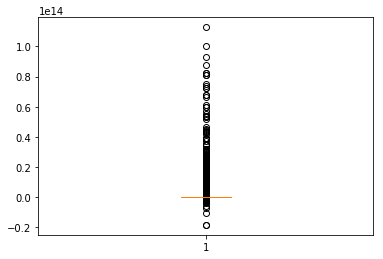

In [103]:
import matplotlib.pyplot as plt
plt.boxplot(df_evening['turnout_perf'])
plt.show()

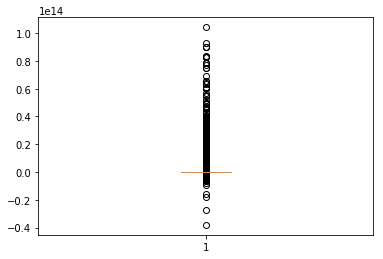

In [104]:
import matplotlib.pyplot as plt
plt.boxplot(df_day['turnout_perf'])
plt.show()

In [ ]:
#Trend: Evening incidents have slower turnout times...based on boxplots and description statistics the trend is valid 
#as the mean, min, max, and quartiles are all faster turnout times for daytime hours

In [123]:
#Determine if back to back response
#First must get rid of all null Available DtTm to make calculations
backtoback_df = filtered_df[filtered_df['Available DtTm'].notnull()]


In [137]:
#sort data by Unit ID and Available DtTm
backtoback_df['Available DtTm'] = pd.to_datetime(backtoback_df['Available DtTm'])
#filtered_df['Response DtTm'] = pd.to_datetime(filtered_df['Response DtTm'])
backtoback_df.head(20)

/Users/stefani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [140]:
backtoback_df = backtoback_df.sort_values(by = ['Unit ID', 'Available DtTm'], ascending = True)
#gs = backtoback_df.groupby(['Unit ID'])['Available DtTm']
#backtoback_df['Time_diff']= gs.diff()
backtoback_df.head(20)

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,turnout_perf,hour,Evening
2284824,100090077,27,10002740,Medical Incident,01/09/2010,01/08/2010,01/09/2010 06:29:17 AM,01/09/2010 06:31:34 AM,2010-01-09 06:31:46,2010-01-09 06:31:51,...,MEDIC,1.0,6,9,Mission,"(37.7495721300101, -122.410215105411)",100090077-27,00:00:05,6,Yes
2284833,100090084,27,10002745,Medical Incident,01/09/2010,01/08/2010,01/09/2010 07:29:23 AM,01/09/2010 07:31:44 AM,2010-01-09 07:32:09,2010-01-09 07:32:15,...,MEDIC,1.0,9,11,Excelsior,"(37.7214392698455, -122.436731381634)",100090084-27,00:00:06,7,No
2284855,100090098,27,10002755,Medical Incident,01/09/2010,01/09/2010,01/09/2010 08:29:24 AM,01/09/2010 08:31:23 AM,2010-01-09 08:31:38,2010-01-09 08:32:52,...,MEDIC,2.0,3,6,Tenderloin,"(37.7836689847285, -122.410926562132)",100090098-27,00:01:14,8,No
2284884,100090121,27,10002770,Medical Incident,01/09/2010,01/09/2010,01/09/2010 09:52:39 AM,01/09/2010 09:53:32 AM,2010-01-09 09:53:40,2010-01-09 09:54:02,...,MEDIC,3.0,7,1,Outer Richmond,"(37.7725207682679, -122.505748190708)",100090121-27,00:00:22,9,No
2284922,100090149,27,10002789,Traffic Collision,01/09/2010,01/09/2010,01/09/2010 10:57:25 AM,01/09/2010 10:58:33 AM,2010-01-09 10:59:00,2010-01-09 10:59:31,...,MEDIC,2.0,8,7,West of Twin Peaks,"(37.7379698827734, -122.469056677033)",100090149-27,00:00:31,10,No
2284927,100090154,27,10002793,Medical Incident,01/09/2010,01/09/2010,01/09/2010 11:32:46 AM,01/09/2010 11:33:21 AM,2010-01-09 11:33:29,2010-01-09 11:33:39,...,MEDIC,1.0,8,4,Sunset/Parkside,"(37.761417280216, -122.483423100639)",100090154-27,00:00:10,11,No
2284981,100090181,27,10002817,Traffic Collision,01/09/2010,01/09/2010,01/09/2010 01:12:02 PM,01/09/2010 01:13:21 PM,2010-01-09 13:14:40,2010-01-09 13:15:05,...,MEDIC,2.0,8,1,Golden Gate Park,"(37.7654037015024, -122.479432039841)",100090181-27,00:00:25,13,No
2287730,100140066,27,10004116,Medical Incident,01/14/2010,01/13/2010,01/14/2010 06:37:03 AM,01/14/2010 06:40:27 AM,2010-01-14 06:41:24,2010-01-14 06:41:51,...,MEDIC,1.0,3,6,South of Market,"(37.7806691632498, -122.401678045598)",100140066-27,00:00:27,6,Yes
2287766,100140093,27,10004135,Medical Incident,01/14/2010,01/14/2010,01/14/2010 08:23:19 AM,01/14/2010 08:23:51 AM,2010-01-14 08:25:04,2010-01-14 08:25:16,...,MEDIC,2.0,10,10,Visitacion Valley,"(37.7154411906533, -122.401908875921)",100140093-27,00:00:12,8,No
2287833,100140141,27,10004168,Medical Incident,01/14/2010,01/14/2010,01/14/2010 10:08:47 AM,01/14/2010 10:11:25 AM,2010-01-14 10:11:56,2010-01-14 10:12:03,...,MEDIC,1.0,5,8,Castro/Upper Market,"(37.7627404204906, -122.43183970674)",100140141-27,00:00:07,10,No


In [153]:
backtoback_df['diff'] = backtoback_df['Available DtTm'].groupby(backtoback_df['Unit ID']).shift() - backtoback_df['Dispatch DtTm']

In [154]:
backtoback_df.tail(100)

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,turnout_perf,hour,Evening,diff
381215,20040394,UU1,2001348,Other,01/04/2002,01/04/2002,01/04/2002 06:57:51 PM,01/04/2002 06:58:13 PM,2002-01-04 18:58:21,2002-01-04 19:55:12,...,4.0,7,2,Seacliff,"(37.7837371507807, -122.488217443175)",020040394-UU1,00:56:51,18,No,-34 days +23:37:49
387913,20150265,UU1,2004528,Medical Incident,01/15/2002,01/15/2002,01/15/2002 03:05:11 PM,01/15/2002 03:06:25 PM,2002-01-15 15:07:58,2002-01-15 16:40:28,...,9.0,1,3,North Beach,"(37.8046841615796, -122.413428555065)",020150265-UU1,01:32:30,15,No,-11 days +07:31:04
392625,20220473,UU1,2006699,Citizen Assist / Service Call,01/22/2002,01/22/2002,01/22/2002 10:30:13 PM,01/22/2002 10:31:03 PM,2002-01-22 22:31:35,2002-01-22 23:26:57,...,4.0,3,10,Potrero Hill,"(37.7606927106062, -122.386101233024)",020220473-UU1,00:55:22,22,Yes,-8 days +21:17:30
439167,20950435,UU1,2028509,Medical Incident,04/05/2002,04/05/2002,04/05/2002 10:29:46 PM,04/05/2002 10:29:48 PM,2002-04-05 22:29:55,2002-04-05 22:42:57,...,5.0,4,5,Western Addition,"(37.7841518625627, -122.434562099013)",020950435-UU1,00:13:02,22,Yes,-73 days +10:48:45
446165,21070388,UU1,2031918,Medical Incident,04/17/2002,04/17/2002,04/17/2002 07:06:13 PM,04/17/2002 07:08:00 PM,2002-04-17 19:11:28,2002-04-17 19:57:41,...,5.0,2,6,Tenderloin,"(37.7810308423516, -122.420439517991)",021070388-UU1,00:46:13,19,No,-12 days +05:23:19
463745,21360389,UU1,2040365,Other,05/16/2002,05/16/2002,05/16/2002 09:21:57 PM,05/16/2002 09:22:36 PM,2002-05-16 21:24:56,2002-05-16 21:28:21,...,1.0,9,11,Outer Mission,"(37.7142510528625, -122.449405634665)",021360389-UU1,00:03:25,21,No,-29 days +00:20:25
485067,21710248,UU1,2050812,Structure Fire,06/20/2002,06/20/2002,06/20/2002 03:33:01 PM,06/20/2002 03:34:38 PM,2002-06-20 15:35:13,2002-06-20 15:47:05,...,13.0,10,10,Bayview Hunters Point,"(37.7457447320811, -122.386265817838)",021710248-UU1,00:11:52,15,No,-35 days +07:09:23
594248,23500068,UU1,2104051,Citizen Assist / Service Call,12/16/2002,12/15/2002,12/16/2002 02:25:40 AM,12/16/2002 02:25:43 AM,2002-12-16 02:25:54,2002-12-16 03:29:19,...,4.0,2,5,Hayes Valley,"(37.775232334473, -122.420959921668)",023500068-UU1,01:03:25,2,Yes,-179 days +13:30:52
601246,23600228,UU1,2107332,Citizen Assist / Service Call,12/26/2002,12/26/2002,12/26/2002 04:27:33 PM,12/26/2002 04:28:41 PM,2002-12-26 16:28:48,2002-12-26 16:59:13,...,1.0,1,3,Financial District/South Beach,"(37.7884994798068, -122.406771145217)",023600228-UU1,00:30:25,16,No,-11 days +13:44:02
643099,30600360,UU1,3017352,Traffic Collision,03/01/2003,03/01/2003,03/01/2003 08:46:32 PM,03/01/2003 08:47:43 PM,2003-03-01 20:48:59,2003-03-01 22:31:10,...,2.0,7,1,Golden Gate Park,"(37.7697349025049, -122.464357975669)",030600360-UU1,01:42:11,20,No,-65 days +03:09:36


In [169]:
backtoback_df['diff_min'] = backtoback_df['diff'].apply(lambda x: round(pd.Timedelta(x).total_minutes() %86400.0 / 60.0))

AttributeError: 'NaTType' object has no attribute 'total_minutes'

In [185]:
#There are additional trends it would be helpful for the dept to know
#These include turnout performance by Neighborhood (Neighborhood - Analysis Boundaries field), Call Type Group, and Priority
#We can see here that Priority 3 emergencies take longer than Priority 2 non-emergencies, but there were Priority 1 recorded
#that maybe shouldn't have been and took longer on turnout performance than Priority 2 and the mean was longer than Priority 3
df_priority = filtered_df[filtered_df['Priority'] == '3']

df_priority.tail(10)
df_priority['turnout_perf'].describe()

count                   3287053
mean     0 days 00:01:33.856494
std      0 days 00:07:11.118695
min           -1 days +13:25:21
25%             0 days 00:00:44
50%             0 days 00:01:13
75%             0 days 00:01:43
max             1 days 07:18:52
Name: turnout_perf, dtype: object

In [187]:
df_priority2 = filtered_df[filtered_df['Priority'] == '2']
df_priority2['turnout_perf'].describe()

count                    748857
mean     0 days 00:01:10.557827
std      0 days 00:03:31.412620
min           -1 days +19:00:40
25%             0 days 00:00:13
50%             0 days 00:00:37
75%             0 days 00:01:21
max             0 days 14:43:34
Name: turnout_perf, dtype: object

In [188]:
df_priority1 = filtered_df[filtered_df['Priority'] == '1']
df_priority1['turnout_perf'].describe()

count                    163509
mean     0 days 00:01:51.593973
std      0 days 00:04:22.555304
min           -1 days +22:17:34
25%             0 days 00:00:26
50%             0 days 00:01:03
75%             0 days 00:01:49
max             0 days 07:03:39
Name: turnout_perf, dtype: object